In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
with sqlite3.connect('../data/pub-res.db') as conn:
    do53_failure_rates = pd.read_sql('select * from do53_failure_rates', con=conn)
    dot_failure_rates = pd.read_sql('select * from dot_failure_rates', con=conn)

In [3]:
do53_failure_rates

,continent_code,resolver_name,err,num,total,percentage
0,AF,CZ.NIC ODVR,1,989,66091,0.014964
1,AF,CleanBrowsing,1,210,66141,0.003175
2,AF,Cloudflare 1.1.1.1,1,4529,66122,0.068495
3,AF,Comodo Secure DNS,1,3005,66122,0.045446
4,AF,DNS.WATCH,1,999,66120,0.015109
...,...,...,...,...,...,...
85,SA,Quad9,1,2105,82221,0.025602
86,SA,SafeDNS,1,1945,82146,0.023677
87,SA,UncensoredDNS,1,2105,82155,0.025622
88,SA,VeriSign Public DNS,1,1901,82136,0.023145


In [4]:
dot_failure_rates

,continent_code,resolver_name,err,num,total,percentage
0,AF,CleanBrowsing,1,17822,57239,0.311361
1,AF,Cloudflare 1.1.1.1,1,5614,57154,0.098226
2,AF,Google Public DNS,1,2866,57160,0.050140
3,AF,Quad9,1,2254,57162,0.039432
4,AF,UncensoredDNS,1,56632,57158,0.990797
5,AS,CleanBrowsing,1,26476,362765,0.072984
6,AS,Cloudflare 1.1.1.1,1,16281,362253,0.044944
7,AS,Google Public DNS,1,5903,362358,0.016291
8,AS,Quad9,1,10410,362356,0.028729
9,AS,UncensoredDNS,1,335750,362323,0.926659


In [5]:
with sqlite3.connect('../data/loc-res.db') as conn:
    local_reg = pd.read_sql('select * from failure_rates_regular', con=conn)
    local_special = pd.read_sql('select * from failure_rates_special', con=conn)

In [6]:
local_reg

,continent_code,do53_failures,dot_failures,do53_successes,dot_successes,do53_total,dot_total,do53_failure_rate,dot_failure_rate
0,AF,12678.0,80363.0,80319.0,None,92997.0,80363.0,0.136327,1.0
1,AS,35700.0,489222.0,424178.0,None,459878.0,489222.0,0.077629,1.0
2,EU,408814.0,4132011.0,2925638.0,None,3334452.0,4132011.0,0.122603,1.0
3,NA,87112.0,1169135.0,835197.0,None,922309.0,1169135.0,0.094450,1.0
4,OC,17979.0,202851.0,155377.0,None,173356.0,202851.0,0.103711,1.0
5,SA,11231.0,138434.0,114448.0,None,125679.0,138434.0,0.089363,1.0


In [7]:
local_special

,continent_code,do53_failures,dot_failures,do53_successes,dot_successes,do53_total,dot_total,do53_failure_rate,dot_failure_rate
0,EU,1625,12343,26894,18312,28519,30655,0.056980,0.402642
1,NA,731,1394,3399,2790,4130,4184,0.176998,0.333174


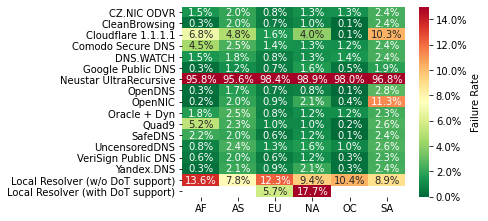

In [8]:
err_df_ = do53_failure_rates
fig, ax = plt.subplots(figsize=(5, 3.5))

ax = sns.heatmap(pd.crosstab(err_df_['continent_code'], err_df_['resolver_name'],
                             values=err_df_['percentage'], aggfunc=np.median
                            ).merge(local_reg[['continent_code', 'do53_failure_rate']
                                             ].rename(columns={'do53_failure_rate' : 'Local Resolver (w/o DoT support)'}
                                                     ), on='continent_code'
                                   ).merge(local_special[['continent_code', 'do53_failure_rate']
                                                        ].rename(columns={'do53_failure_rate' : 'Local Resolver (with DoT support)'}
                                                                ), on='continent_code', how='left').set_index('continent_code').T,
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Failure Rate',
                      'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))},
            fmt='.1%',
            vmin=0,
            vmax=0.15,
           )
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig('../plots/do53-failure-rate.pdf', bbox_inches='tight')

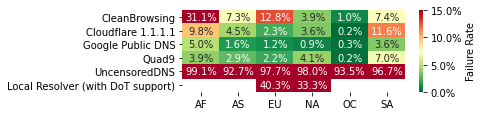

In [9]:
err_df_ = dot_failure_rates
fig, ax = plt.subplots(figsize=(5, 1.5))

ax = sns.heatmap(pd.crosstab(err_df_['continent_code'], err_df_['resolver_name'],
                             values=err_df_['percentage'], aggfunc=np.median
                            ).merge(local_special[['continent_code', 'dot_failure_rate']
                                                 ].rename(columns={'dot_failure_rate' : 'Local Resolver (with DoT support)'}
                                                         ), on='continent_code', how='left').set_index('continent_code').T,
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Failure Rate',
                      'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))},
            fmt='.1%',
            vmin=0,
            vmax=0.15,
           )
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig('../plots/dot-failure-rate.pdf', bbox_inches='tight')

In [10]:
do53_failure_stats = do53_failure_rates.groupby('resolver_name')['num'].sum().reset_index()

In [11]:
do53_failure_stats['total'] = do53_failure_rates.groupby('resolver_name')['total'].sum().reset_index()['total']

In [12]:
local_reg[['do53_failures', 'do53_total']].sum()

do53_failures     573514.0
do53_total       5108671.0
dtype: float64

In [13]:
local_special[['do53_failures', 'do53_total']].sum()

do53_failures     2356
do53_total       32649
dtype: int64

In [14]:
do53_failure_stats = do53_failure_stats.append({'resolver_name' : 'Local Resolver (w/o DoT support)',
                        'num' : local_reg['do53_failures'].sum(),
                        'total' : local_reg['do53_total'].sum(),
                       }, ignore_index=True).append({'resolver_name' : 'Local Resolver (with DoT support)',
                                                     'num' : local_special['do53_failures'].sum(),
                                                     'total' : local_special['do53_total'].sum(),
                                                    }, ignore_index=True)

In [15]:
do53_failure_stats['f_rate'] = do53_failure_stats['num'] / do53_failure_stats['total']

In [16]:
do53_failure_stats

,resolver_name,num,total,f_rate
0,CZ.NIC ODVR,44942.0,4269957.0,0.010525
1,CleanBrowsing,37681.0,4273000.0,0.008818
2,Cloudflare 1.1.1.1,107841.0,4273000.0,0.025238
3,Comodo Secure DNS,65849.0,4272976.0,0.015411
4,DNS.WATCH,43349.0,4272960.0,0.010145
5,Google Public DNS,38670.0,4272587.0,0.009051
6,Neustar UltraRecursive,4190474.0,4269365.0,0.981522
7,OpenDNS,34826.0,4273051.0,0.008150
8,OpenNIC,61077.0,4266712.0,0.014315
9,Oracle + Dyn,46247.0,4272609.0,0.010824


In [17]:
dot_failure_stats = dot_failure_rates.groupby('resolver_name')['num'].sum().reset_index()

In [18]:
dot_failure_stats['total'] = dot_failure_rates.groupby('resolver_name')['total'].sum().reset_index()['total']

In [19]:
local_reg[['dot_failures', 'dot_total']].sum()  # should be equal, so 100% failure rate

dot_failures    6212016.0
dot_total       6212016.0
dtype: float64

In [20]:
local_special[['dot_failures', 'dot_total']].sum()

dot_failures    13737
dot_total       34839
dtype: int64

In [21]:
dot_failure_stats = dot_failure_stats.append({'resolver_name' : 'Local Resolver (with DoT support)',
                        'num' : local_special['dot_failures'].sum(),
                        'total' : local_special['dot_total'].sum(),
                       }, ignore_index=True)

In [22]:
dot_failure_stats['f_rate'] = dot_failure_stats['num'] / dot_failure_stats['total']

In [23]:
dot_failure_stats

,resolver_name,num,total,f_rate
0,CleanBrowsing,430401,4163095,0.103385
1,Cloudflare 1.1.1.1,122932,4157033,0.029572
2,Google Public DNS,53059,4157354,0.012763
3,Quad9,110404,4157340,0.026556
4,UncensoredDNS,4039111,4157277,0.971576
5,Local Resolver (with DoT support),13737,34839,0.394299


In [24]:
failure_table = do53_failure_stats.merge(dot_failure_stats, on='resolver_name', suffixes=('_do53', '_dot'), how='left')

In [25]:
failure_table = failure_table.append({'resolver_name' : 'Total',
                                      'num_do53' : failure_table['num_do53'].sum(),
                                      'total_do53' : failure_table['total_do53'].sum(),
                                      'f_rate_do53' : failure_table['num_do53'].sum() / failure_table['total_do53'].sum(),
                                      'num_dot' : failure_table['num_dot'].sum(),
                                      'total_dot' : failure_table['total_dot'].sum(),
                                      'f_rate_dot' : failure_table['num_dot'].sum() / failure_table['total_dot'].sum(),
                                     }, ignore_index=True)

In [26]:
failure_table

,resolver_name,num_do53,total_do53,f_rate_do53,num_dot,total_dot,f_rate_dot
0,CZ.NIC ODVR,44942.0,4269957.0,0.010525,NaN,NaN,NaN
1,CleanBrowsing,37681.0,4273000.0,0.008818,430401.0,4163095.0,0.103385
2,Cloudflare 1.1.1.1,107841.0,4273000.0,0.025238,122932.0,4157033.0,0.029572
3,Comodo Secure DNS,65849.0,4272976.0,0.015411,NaN,NaN,NaN
4,DNS.WATCH,43349.0,4272960.0,0.010145,NaN,NaN,NaN
5,Google Public DNS,38670.0,4272587.0,0.009051,53059.0,4157354.0,0.012763
6,Neustar UltraRecursive,4190474.0,4269365.0,0.981522,NaN,NaN,NaN
7,OpenDNS,34826.0,4273051.0,0.008150,NaN,NaN,NaN
8,OpenNIC,61077.0,4266712.0,0.014315,NaN,NaN,NaN
9,Oracle + Dyn,46247.0,4272609.0,0.010824,NaN,NaN,NaN


In [27]:
print(failure_table.round(3).to_latex(index=False).replace('NaN', '---'))

\begin{tabular}{lrrrrrr}
\toprule
                     resolver\_name &   num\_do53 &  total\_do53 &  f\_rate\_do53 &    num\_dot &   total\_dot &  f\_rate\_dot \\
\midrule
                       CZ.NIC ODVR &    44942.0 &   4269957.0 &        0.011 &        --- &         --- &         --- \\
                     CleanBrowsing &    37681.0 &   4273000.0 &        0.009 &   430401.0 &   4163095.0 &       0.103 \\
                Cloudflare 1.1.1.1 &   107841.0 &   4273000.0 &        0.025 &   122932.0 &   4157033.0 &       0.030 \\
                 Comodo Secure DNS &    65849.0 &   4272976.0 &        0.015 &        --- &         --- &         --- \\
                         DNS.WATCH &    43349.0 &   4272960.0 &        0.010 &        --- &         --- &         --- \\
                 Google Public DNS &    38670.0 &   4272587.0 &        0.009 &    53059.0 &   4157354.0 &       0.013 \\
            Neustar UltraRecursive &  4190474.0 &   4269365.0 &        0.982 &        --- &         -